<a href="https://colab.research.google.com/github/BagusRezky/Machine-Learning/blob/main/11%20-%20CNN%20/%20Tugasno2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas No 2
**Buatlah model CNN untuk klasifikasi dataset MNIST**

In [ ]:
# Impor Library
# mengimpor TensorFlow untuk membuat dan melatih model neural network.
import tensorflow as tf
# Mengimpor modul layers dan models dari Keras, yang merupakan bagian dari TensorFlow untuk membangun model neural network.
from tensorflow.keras import layers, models
#  Mengimpor dataset MNIST yang berisi gambar digit tulisan tangan.
from tensorflow.keras.datasets import mnist
# Mengimpor fungsi to_categorical untuk melakukan one-hot encoding pada label.
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Memuat dan membagi dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Normalisasi dan Reshape data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# One-Hot Encoding label
train_labels = to_categorical(train_labels) # Melakukan one-hot encoding pada label pelatihan.
test_labels = to_categorical(test_labels) # Melakukan one-hot encoding pada label uji.

In [ ]:
# Membangun model CNN

#  Membuat model Sequential, yang berarti kita akan membangun model layer-by-layer secara berurutan.
model = models.Sequential()

# Menambahkan layer konvolusi dengan 32 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan input_shape=(28, 28, 1) yang sesuai dengan dimensi gambar MNIST.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Menambahkan layer pooling maksimum dengan ukuran pool 2x2 untuk mengurangi dimensi gambar.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Menambahkan layer flatten untuk meratakan output dari layer sebelumnya menjadi satu dimensi.
model.add(layers.Flatten())
# Menambahkan layer dense (fully connected) dengan 64 neuron dan fungsi aktivasi ReLU.
model.add(layers.Dense(64, activation='relu'))
# Menambahkan layer output dengan 10 neuron (sesuai jumlah kelas pada MNIST) dan fungsi aktivasi softmax untuk output klasifikasi multikelas.
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
# Mengompilasi model dengan menggunakan optimizer Adam
# fungsi loss categorical_crossentropy (karena ini adalah masalah klasifikasi multikelas), dan metrik akurasi.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Melatih model dengan data pelatihan selama 10 epoch, menggunakan data validasi untuk mengukur performa model selama pelatihan.
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 22s 5ms/step - loss: 0.1445 - accuracy: 0.9555 - val_loss: 0.0468 - val_accuracy: 0.9863
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0482 - accuracy: 0.9853 - val_loss: 0.0328 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0237 - val_accuracy: 0.9923
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0246 - accuracy: 0.9929 - val_loss: 0.0267 - val_accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0204 - accuracy: 0.9932 - val_loss: 0.0361 - val_accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0315 - val_accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.0341 - val_accur

313/313 - 1s - loss: 0.0376 - accuracy: 0.9908 - 734ms/epoch - 2ms/step


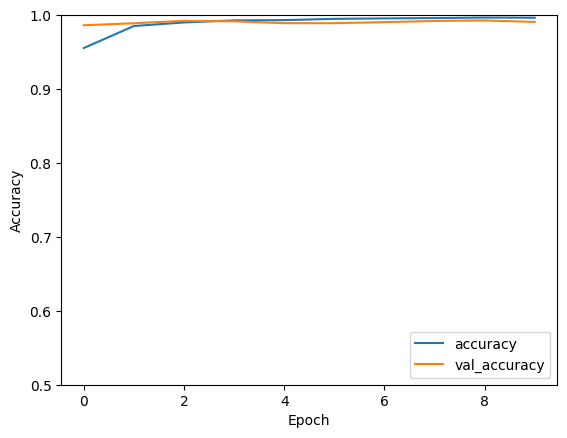

In [ ]:
# Visualisasi akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print(test_acc)

0.9908000230789185


Akurasi yang dihasilkan adalah 99.08%

Pada gambar tersebut, akurasi model meningkat secara bertahap dari epoch 1 hingga epoch 6, dengan akurasi tertinggi mencapai 0,9908 pada epoch 6. Nilai loss juga menurun secara bertahap dari epoch 1 hingga epoch 6, dengan nilai loss terendah mencapai 0,0376 pada epoch 6.

Berdasarkan informasi tersebut, dapat disimpulkan bahwa model melakukan learning dengan baik. Akurasi model meningkat secara signifikan dari epoch 1 hingga epoch 6, dan nilai loss juga menurun secara signifikan. Hal ini menunjukkan bahwa model tersebut mampu belajar dari data pelatihan dan meningkatkan kinerjanya.

1/1 [==============================] - 0s 30ms/step


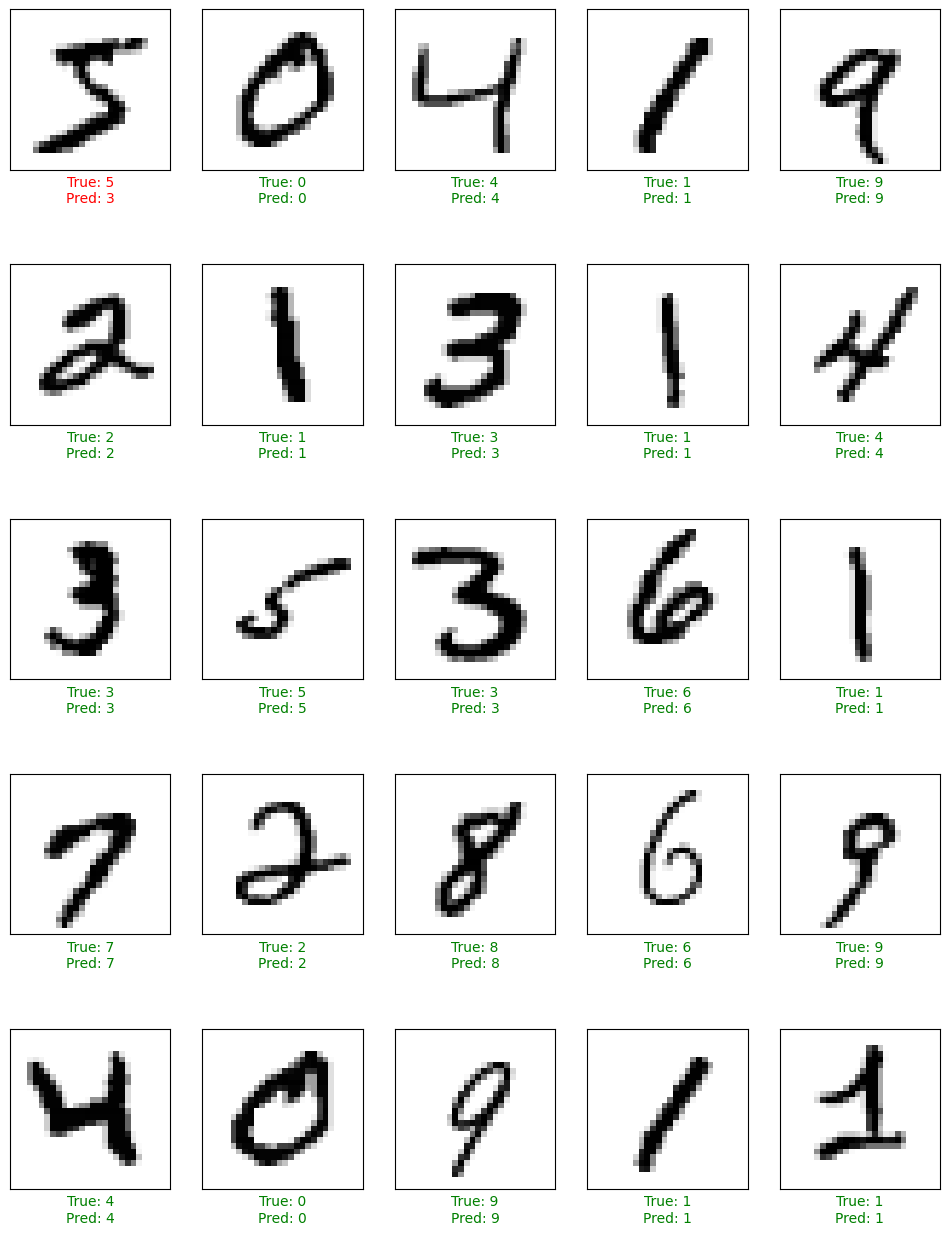

In [ ]:
# Fungsi untuk menampilkan contoh hasil prediksi
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(images, true_labels, model, class_names, num_samples=25):
    # Menggunakan model untuk melakukan prediksi
    predictions = model.predict(images[:num_samples])

    # Mengubah prediksi menjadi indeks kelas dengan nilai tertinggi
    predicted_labels = np.argmax(predictions, axis=1)

    # Tampilkan hasil prediksi
    plt.figure(figsize=(12, 16))
    for i in range(num_samples):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)

        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if true_label == predicted_label else 'red'
        plt.xlabel(f'True: {true_label}\nPred: {predicted_label}', color=color)

    plt.show()

# Contoh definisi class_names
class_names = [str(i) for i in range(10)]

# Memanggil fungsi untuk menampilkan hasil prediksi pada set pelatihan
visualize_predictions(train_images, np.argmax(train_labels, axis=1), model, class_names)
